In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1)

Number of training examples: 400
X.shape: (2, 400)
Y.shape: (1, 400)


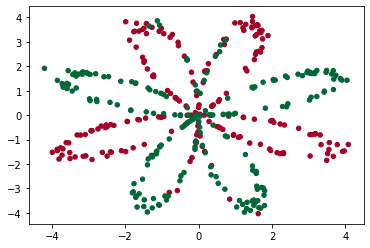

In [5]:
# check data
X, Y = load_planar_dataset()
m = X.shape[1]
print(f'Number of training examples: {m}')
print(f'X.shape: {X.shape}')
print(f'Y.shape: {Y.shape}')

plt.scatter(X[0], X[1], s = 20, c=Y[0], cmap=plt.cm.RdYlGn);

In [6]:
def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s

In [7]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Shape
        W1.shape == (n_h, n_x) 
        b1.shape == (n_h, 1)
        W2.shape == (n_y, n_h)
        b2.shape == (n_y, 1)
    """
    W1 = np.random.randn(n_h, n_x)
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)
    b2 = np.zeros((n_y, 1))
    
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters

In [8]:
def forward_prop(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    return A2, cache

In [9]:
def compute_cost(A2, Y):
    cost = -1 / m * (np.sum(Y * np.log(A2)) + np.sum((1 - Y) * np.log(1 - A2)))
    return np.squeeze(cost)

In [10]:
def backward_prop(parameters, cache, X, Y):
    m = X.shape[1]
    W1, W2 = parameters["W1"], parameters["W2"]
    A1, A2 = cache["A1"], cache["A2"]
    
    dZ2 = A2 - Y
    dW2 = 1 / m * np.dot(dZ2, A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - A1 ** 2)
    dW1 = 1 / m * np.dot(dZ1, X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    return grads

In [11]:
def update_parameters(parameters, grads, learning_rate):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters

In [12]:
def nn_model(X, Y, n_h, learning_rate=1.2, num_iterations=10000, print_cost=False):
    n_x = X.shape[0]
    n_y = Y.shape[0]
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    costs = []
    for i in range(num_iterations):
        A2, cache = forward_prop(X, parameters)
        grads = backward_prop(parameters, cache, X, Y)
        prameters = update_parameters(parameters, grads, learning_rate)
        
        if i % 500 == 0:
            cost = compute_cost(A2, Y)
            costs.append(cost)
            if print_cost:
                print(f'Cost of iteration {i}: {cost}')
    return parameters
        

In [13]:
def predict(parameters, X):
    A2, _ = forward_prop(X, parameters)
    return (A2 > 0.5)

In [14]:
parameters = nn_model(X, Y, n_h=4, learning_rate=1.2, num_iterations=10000, print_cost=True)
prediction = predict(parameters, X)

Cost of iteration 0: 0.8060167331648931
Cost of iteration 500: 0.2953337658585472
Cost of iteration 1000: 0.2798181081475332
Cost of iteration 1500: 0.27298366958473236
Cost of iteration 2000: 0.2681492832835042
Cost of iteration 2500: 0.26441871722150345
Cost of iteration 3000: 0.26144768224165016
Cost of iteration 3500: 0.2590393367333687
Cost of iteration 4000: 0.25705858626691475
Cost of iteration 4500: 0.25540775972035973
Cost of iteration 5000: 0.25401510646490566
Cost of iteration 5500: 0.252827303348048
Cost of iteration 6000: 0.25180420631931905
Cost of iteration 6500: 0.25091516823290483
Cost of iteration 7000: 0.250136462586457
Cost of iteration 7500: 0.24944947377728702
Cost of iteration 8000: 0.2488394135542204
Cost of iteration 8500: 0.24829439920305504
Cost of iteration 9000: 0.24780478253270244
Cost of iteration 9500: 0.24736265486673234


In [15]:
accuracy = np.squeeze(np.dot(prediction, Y.T) + np.dot(1 - Y, 1 - prediction.T)) / Y.shape[1] * 100
print(f'Accuracy: {accuracy}')

Accuracy: 91.25
